# Project: Investigate a Dataset - [tmdb-movies_dataset]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Dataset Description 
To complete the Data Analysis project,I will be using the TMDb movies dataset.
This dataset contains information of about 10866 rows of movies collections from The Movie Database (TMDb) and the data comprises of 21 columns which includes the following;

1. id =         A unique identifier for each movie.
2. imdb_id =      A unique identifier for each movie on tmdb.
3. popularity =   A numeric quantity detailing the movie popularity.
4. budget   =     The cost that was allocated to the making of the movie.
5. revenue  =     The total momey realised or generated from the movie
6. original_title =The title of the movie before translation or adaptation.
7. cast         =  The names of lead and supporting actors and actresses.
8. homepage     =   A link to the homepage of the movie
9. director     =  The director of the movie (the one who directed the movie)
10. tagline      =  Tagline of the movies.
11. overview     =  A brief description of the movie.
12. runtime      =  The running time of the movie in minutes.
13. genres       =  The genre of the movie e.g.adventure, Action, Comedy ,Thriller etc
14. production_companies = The production house of the movie.
15. release_date =  The release date of the movie.
16. vote_count   =  Number of vote ratings the movie recieved.
17. vote_average  = Average ratings the movie recieved.
18. release_year =  The year in which the movie was released.
19. budget_adj =    Shows the adjusted budget associated with the movie in respect to 2010 dollars as aresult of inflation.
20. revenue_adj =   Shows the adjusted revenue associated with the movie in respect to 2010 dollars as aresult of inflation.



### Question(s) for Analysis

1. what are the top 5 movies with the most and least earned profits?
2. Which movies genre are most popular over the years?
2. What genres has the highest revenue generated over the years
4. which movies is the most popular over the years
5. What is the correlation between budget and revenue generated?


In [1]:
#importing the packages needed for this analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Wrangling
 
### General Properties of the dataset

In [2]:
#loading the csv file and storing it in a variable  named "df"
df = pd.read_csv('tmdb-movies.csv')
# inspecting the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# summary of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
# cheching the number of rows and columns
df.shape

(10866, 21)

In [5]:
#  information about each column in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

The information displayed shows that the datasets contains a total number of 10866 rows and 21 number of columns of which
some of the  observed data are either missing, wrongly asigned datatypes or contains zero or no values.
in order to work with the data efficiently,some of the columns also will be dropped which are not needed in this analysis.

## Data Cleaning
1. Removing columns that are not required.
2. Handling zero values
3. Chacking and droping Null values.
4. Checking and Removing duplicates.
5. Changing the format of release_date into DateTime format.
6. Checking datatype of columns and initiate changes if required.

### Removing columns that are not required for this analysis.

In [6]:
# dropping columns that are not relevants in this analysis 
df.drop(['imdb_id', 'tagline', 'keywords', 'overview','production_companies','vote_average', 'homepage','budget_adj', 'revenue_adj'], axis =1, inplace = True)

In [7]:
#previewing the new dataset
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,2015


In [8]:
df.shape

(10866, 12)


### Handling zero values

In [9]:
 # Checking budget and revenue for posible zero values
df_zero = df.query('revenue==0 or budget == 0 or runtime ==0')

In [10]:
df_zero.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year
30,280996,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,Bill Condon,103,Mystery|Drama,6/19/15,425,2015
36,339527,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,Afonso Poyart,101,Crime|Drama|Mystery,9/3/15,474,2015
48,265208,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,1/14/15,481,2015
67,334074,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,5/21/15,280,2015
72,284289,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,Jean-Baptiste LÃ©onetti,95,Thriller,4/17/15,81,2015


In [11]:
# replacing values with zero  in budget, revenue and runtime with NAN
df['budget'].replace(0, np.NAN, inplace=True)
df['revenue'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

### Checking and dropping Null values.

In [12]:
#Checking for null values
df.isna().any()

id                False
popularity        False
budget             True
revenue            True
original_title    False
cast               True
director           True
runtime            True
genres             True
release_date      False
vote_count        False
release_year      False
dtype: bool

In [13]:
#calculate the total number of null values in each column
df.isna().sum()

id                   0
popularity           0
budget            5696
revenue           6016
original_title       0
cast                76
director            44
runtime             31
genres              23
release_date         0
vote_count           0
release_year         0
dtype: int64

In [14]:
#dropping the null values
df.dropna(inplace = True)

In [15]:
# Cross checking if there is null
df.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
release_year      0
dtype: int64

### Checking and Removing duplicates.

In [16]:
# checking for dupplicates
sum(df.duplicated())

1

In [17]:
# removing duplicates
df.drop_duplicates(inplace =True)


# cross checking for duplicates
sum(df.duplicated())

0

In [18]:
# checking the new data 
df.shape

(3849, 12)

In [19]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,3/18/15,2480,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,4/1/15,2947,2015


### Changing the format of release_date into DateTime format.

In [20]:
# Changing the format of release_date to datetime format
df['release_date'] = pd.to_datetime(df['release_date'])

#  checking the new release_date format
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,2015
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,2015
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,2015
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,2015


### Checking datatype of columns and initiate changes if required.

In [21]:
# checking data types of columns
df.dtypes

id                         int64
popularity               float64
budget                   float64
revenue                  float64
original_title            object
cast                      object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
release_year               int64
dtype: object

In [22]:
#changing data_type of runtime to float
df['runtime'] = df['runtime'].astype(float)

In [23]:
change_dtype = ['budget', 'revenue']
df[change_dtype] = df[change_dtype].astype(np.int64)


In [24]:
# confirming if the changes has been effected
df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                  float64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
release_year               int64
dtype: object

In [25]:
# Descriptive statistics of our cleaned dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,release_year
count,3849.000000,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000
mean,39885.146791,1.192933,3.724886e+07,1.078148e+08,109.217459,528.387114,2001.258249
std,67248.890597,1.475622,4.221699e+07,1.766175e+08,19.914141,880.333629,11.285642
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,1960.000000
25%,6072.000000,0.463337,1.000000e+07,1.367069e+07,95.000000,71.000000,1995.000000
50%,11313.000000,0.798582,2.400000e+07,4.490726e+07,106.000000,205.000000,2004.000000
75%,38575.000000,1.374300,5.000000e+07,1.243052e+08,119.000000,581.000000,2010.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,2015.000000


In [26]:
#copying the dataframe into a new one
df2 = df.copy()
# checking for consistences 
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              3849 non-null   int64         
 1   popularity      3849 non-null   float64       
 2   budget          3849 non-null   int64         
 3   revenue         3849 non-null   int64         
 4   original_title  3849 non-null   object        
 5   cast            3849 non-null   object        
 6   director        3849 non-null   object        
 7   runtime         3849 non-null   float64       
 8   genres          3849 non-null   object        
 9   release_date    3849 non-null   datetime64[ns]
 10  vote_count      3849 non-null   int64         
 11  release_year    3849 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 390.9+ KB


<AxesSubplot:xlabel='revenue', ylabel='budget'>

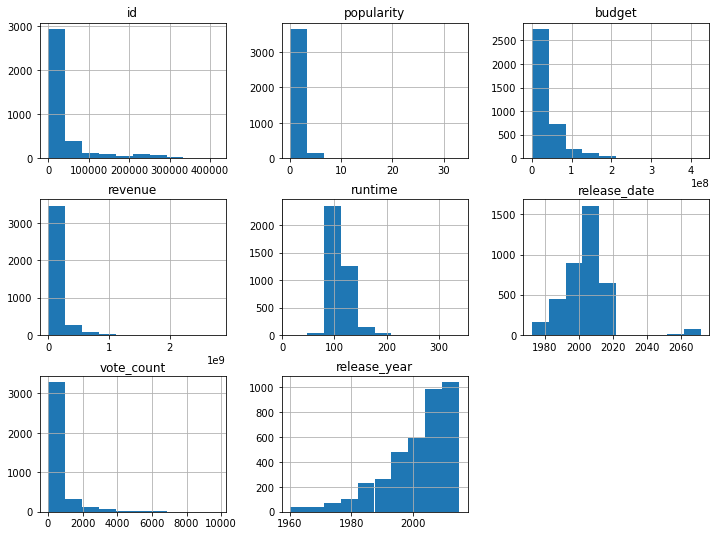

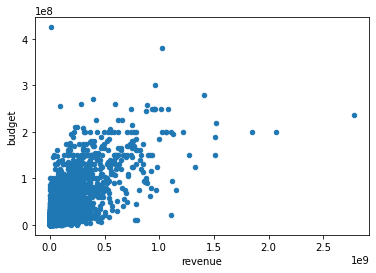

In [27]:
# exploring the data with visuals
df2.hist(figsize=(12,9));
df.plot(x = 'revenue', y = 'budget', kind ='scatter')

## Exploratory Data Analysis

### 1. what are the top 5 movies with the most and least earned profits?

In [28]:
# inserting a new column called earned_profit
df2['earned_profit']= df2['revenue'] - df2['budget']
df2.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year,earned_profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,2015,1316249360


In [29]:
# sorting the data in decending order by earned_profit
most_profit = df2.sort_values('earned_profit',ascending=False)
most_profit.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year,earned_profit
1386,19995,9.432768,237000000,2781505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162.0,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,2009,2544505847
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,2015,1868178225
5231,597,4.355219,200000000,1845034188,Titanic,Kate Winslet|Leonardo DiCaprio|Frances Fisher|...,James Cameron,194.0,Drama|Romance|Thriller,1997-11-18,4654,1997,1645034188
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,2015,1363528810
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,2015,1316249360


In [30]:
# calculating the 5 least earned profits by sorting the data in ascending order
least_profit = df2.sort_values('earned_profit',ascending = True)
least_profit.head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year,earned_profit
2244,46528,0.250540,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100.0,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,2010,-413912431
5508,57201,1.214510,255000000,89289910,The Lone Ranger,Johnny Depp|Armie Hammer|William Fichtner|Hele...,Gore Verbinski,149.0,Action|Adventure|Western,2013-07-03,1607,2013,-165710090
7031,10733,0.948560,145000000,25819961,The Alamo,Dennis Quaid|Billy Bob Thornton|Jason Patric|P...,John Lee Hancock,137.0,Western|History|War,2004-04-07,60,2004,-119180039
3484,50321,0.921653,150000000,38992758,Mars Needs Moms,Seth Green|Joan Cusack|Dan Fogler|Breckin Meye...,Simon Wells,88.0,Adventure|Animation|Family,2011-03-09,129,2011,-111007242
4970,10009,1.653031,100000000,250,Brother Bear,Joaquin Phoenix|Jeremy Suarez|Rick Moranis|Joa...,Aaron Blaise|Robert Walker,85.0,Animation|Adventure|Family|Fantasy,2003-10-20,753,2003,-99999750


Text(0.5, 0, 'earned_profit')

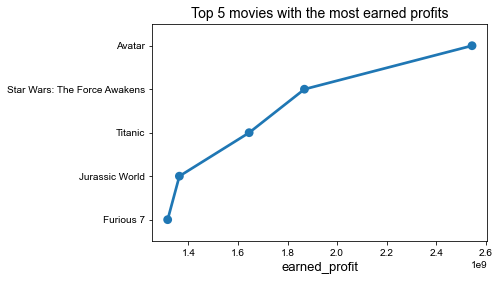

In [31]:
# using a plot to show top 5 movies with the most earned profits.
x = list(map(str,(most_profit['original_title'])))
x = list(x[:5])
y = list(most_profit['earned_profit'][:5])

# make a plot using pointplot for top 5 movies with the most earned profits.
ax = sns.pointplot(x=y,y=x)

#setting up the require figure size
sns.set(rc={'figure.figsize':(8,5)})
#setting the title and labels of the plot.
ax.set_title("Top 5 movies with the most earned profits",fontsize = 14)
ax.set_xlabel('earned_profit',fontsize = 13)


 the top 5 movies with most profits are;
 Avatar which generated 2.5 billion profits,
 Star Wars: The Force Awakens with 1.8 billion profits,
 Titanic  with 1.6 billion profits,
 jurasic world with 1.3 billion profits,
 Furious 7 with 1.3 billion,

Text(0.5, 0, 'earned_profit')

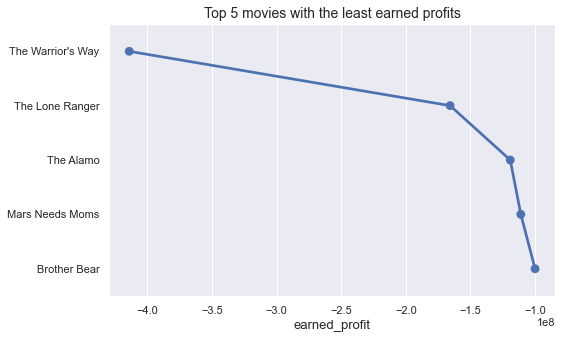

In [32]:
# using a plot to show the least 5 movies with the most earned profits.
#creating new column 'original_title' in the new dataframe from the original dataframe

x = list(map(str,(least_profit['original_title'])))
x = list(x[:5])
y = list(least_profit['earned_profit'][:5])

# make a plot using pointplot for top 5 movies with the most earned profits.
ax = sns.pointplot(x=y,y=x)

#setting up the require figure size
sns.set(rc={'figure.figsize':(8,5)})
#setting the title and labels of the plot.
ax.set_title("Top 5 movies with the least earned profits",fontsize = 14)
ax.set_xlabel('earned_profit',fontsize = 13)


from the plots above, the following can be drawn that the movies that has the least profit were as follows:
1. the worriors way which has a profits of -413 million
2. the lone Ranger -165 million
3. the alamo -119 million
4. mars needs Moms -111 million
5. Brother Bear -99 million

### 2. Which movies genre are the most popular over the years?

In [33]:
# checkine the unique values of genres seperated by pipes
df.genres.unique()

array(['Action|Adventure|Science Fiction|Thriller',
       'Adventure|Science Fiction|Thriller',
       'Action|Adventure|Science Fiction|Fantasy', ...,
       'Action|Drama|Horror|Thriller', 'Adventure|Animation|Drama',
       'Action|Adventure|Drama|War|Romance'], dtype=object)

In [34]:
# slitting the genre column to an array
df['genres'] = df.genres.str.split('|')

In [35]:
# using explode function to place the genre in rows
df = df.explode('genres')
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action,2015-06-09,5562,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Adventure,2015-06-09,5562,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Science Fiction,2015-06-09,5562,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Thriller,2015-06-09,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action,2015-05-13,6185,2015


In [36]:
# creating a copy of genre
df_genre = df.copy()

In [37]:
# select the release year, genre and popularity and  apply groupby
df_genre = df_genre[['release_year','genres','popularity']]
# grouping by genre
df_genre.head() 

,release_year,genres,popularity
0,2015,Action,32.985763
0,2015,Adventure,32.985763
0,2015,Science Fiction,32.985763
0,2015,Thriller,32.985763
1,2015,Action,28.419936


In [38]:
#Geting the average popularity of each genre and grouping them by genres and release year
df_mean = df_genre.groupby(['release_year','genres']).popularity.mean()

In [39]:
# checking the mean
df_mean

release_year  genres         
1960          Action             1.504538
              Adventure          1.872132
              Comedy             0.501564
              Drama              1.564871
              History            1.136943
                                   ...   
2015          Romance            2.108030
              Science Fiction    7.594638
              Thriller           3.913396
              War                1.943238
              Western            7.504550
Name: popularity, Length: 841, dtype: float64

In [40]:
# get the largest avaerage popular genre from each year
df_m = df_mean.to_frame().groupby(level = 'release_year').popularity.nlargest(1).to_frame()
df_m.reset_index(level = 2, inplace = True)

In [41]:
df_m

,,genres,popularity
release_year,release_year,,
1960,1960,Horror,2.610362
1961,1961,Animation,2.631987
1962,1962,Thriller,3.170651
1963,1963,Adventure,1.586280
1964,1964,Action,3.153791
1965,1965,Thriller,1.910465
1966,1966,Drama,0.485092
1967,1967,Animation,2.550704
1968,1968,Mystery,1.728887


In [42]:
# count the genres with the highest values from each year
genre =df_m.genres.value_counts()
genre

Animation          15
Fantasy             9
Adventure           6
Science Fiction     4
Action              3
Family              3
Crime               3
War                 3
Horror              2
Thriller            2
Drama               2
Western             2
Mystery             1
Music               1
Name: genres, dtype: int64

<AxesSubplot:title={'center':'movies popularity by each genres'}, xlabel='Genres', ylabel='popularity'>

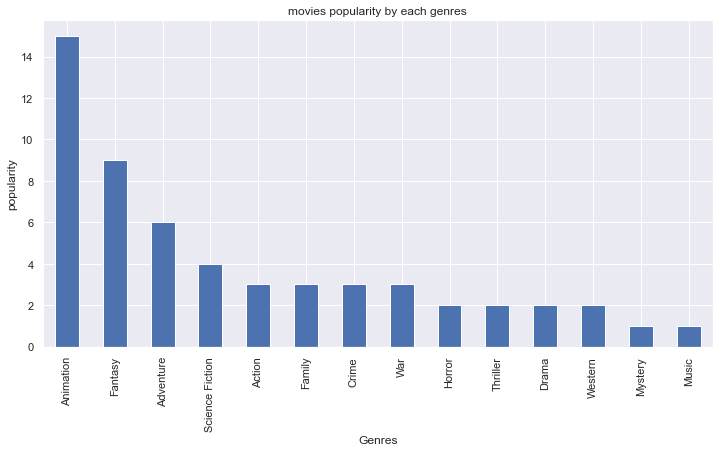

In [43]:
# plotting a bar chart to represt the data
plt.figure(figsize =(12,6))
genre.plot.bar(title = 'movies popularity by each genres', xlabel = 'Genres', ylabel ='popularity')

The result shows that animation has the highset count by movie genre in terms of popularity over the years with a count of 15 times followed by fantasy movies with 9 count and Adventure with 6 count.


### 3 What genres has the highest revenue generated over the years

In [44]:
df3 = df.copy()

In [45]:
df3.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action,2015-06-09,5562,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Adventure,2015-06-09,5562,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Science Fiction,2015-06-09,5562,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Thriller,2015-06-09,5562,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action,2015-05-13,6185,2015


In [46]:
# creating Bin edges that will be used to cut years into groups
bin_edges = [1960, 1970, 1980, 1990, 2000, 2010, 2020]

In [47]:
# bins levels groups names
bin_names = [ '60s','70s','80s','90s', '2000s', '2010s']

In [48]:
# Creates acidity_levels column
df3['release_year'] = pd.cut(df['release_year'], bin_edges, labels = bin_names)

# Checks for successful creation of this column
df3.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action,2015-06-09,5562,2010s
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Adventure,2015-06-09,5562,2010s
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Science Fiction,2015-06-09,5562,2010s
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Thriller,2015-06-09,5562,2010s
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action,2015-05-13,6185,2010s


In [49]:
# creating a pivot tables to display the data
df_pivot=pd.pivot_table(df3,index="release_year",columns="genres",values='revenue',aggfunc=pd.Series.mean)

In [50]:
df_pivot

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
60s,5.060697e+07,5.958634e+07,1.591330e+08,4.095587e+07,3.151942e+07,NaN,4.051548e+07,9.385399e+07,5.563636e+07,NaN,4.074072e+07,1.559965e+07,5.724305e+07,2.276228e+07,5.077120e+07,2.438504e+07,NaN,5.841416e+07,4.360921e+07,2.367856e+07
70s,8.816640e+07,1.230415e+08,2.929150e+07,5.300305e+07,4.338742e+07,NaN,5.553996e+07,3.166078e+07,5.123102e+07,NaN,3.141121e+07,8.123878e+07,9.272887e+07,2.875398e+07,3.628083e+07,1.048759e+08,NaN,7.039046e+07,4.229030e+07,4.264488e+07
80s,8.857684e+07,1.036453e+08,7.732544e+07,7.151996e+07,5.528279e+07,4.379271e+06,6.106972e+07,1.122332e+08,6.958384e+07,5.285277e+06,3.939924e+07,2.579651e+07,4.833941e+07,4.076721e+07,7.443735e+07,6.878269e+07,NaN,5.569882e+07,8.369361e+07,1.523670e+08
90s,1.237587e+08,1.480088e+08,1.728244e+08,8.792801e+07,9.297236e+07,3.391531e+07,8.925990e+07,1.370717e+08,1.209738e+08,8.117912e+06,1.095965e+08,5.730019e+07,9.453886e+07,1.075794e+08,1.006929e+08,1.147472e+08,42000000.0,1.056516e+08,1.310012e+08,9.165591e+07
2000s,1.573097e+08,2.338493e+08,2.624678e+08,1.001617e+08,8.048491e+07,2.332152e+07,7.212478e+07,2.209967e+08,2.756491e+08,1.408331e+07,9.429958e+07,6.922897e+07,9.213296e+07,9.554013e+07,8.607295e+07,1.674644e+08,NaN,9.642330e+07,1.090015e+08,6.657578e+07
2010s,2.511339e+08,3.756919e+08,3.570491e+08,1.260494e+08,1.095175e+08,3.293657e+07,7.723798e+07,3.096731e+08,3.510420e+08,NaN,7.786391e+07,6.425847e+07,8.811824e+07,1.018813e+08,8.598883e+07,3.060119e+08,NaN,1.194394e+08,1.371825e+08,2.032940e+08


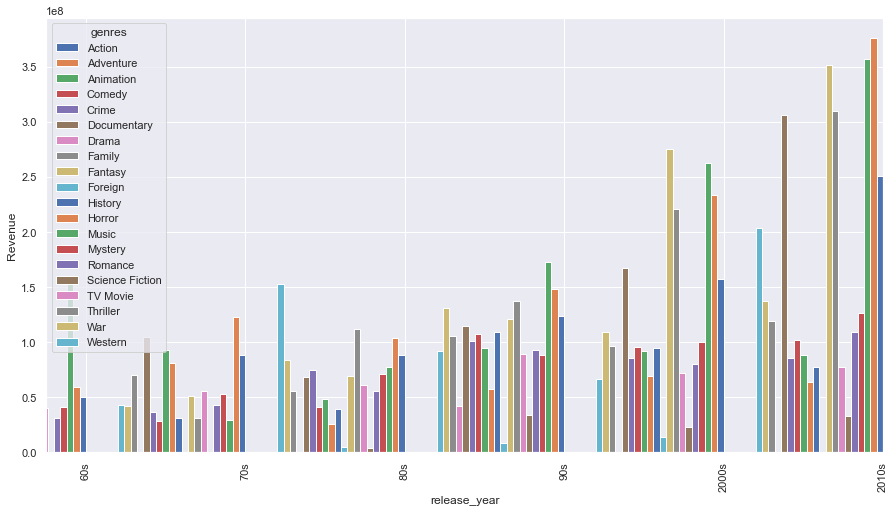

In [51]:
# using a subplots bar charts for visuals
fig, ax = plt.subplots(figsize = (15,8))
df_pivot.plot(kind='bar',ax = ax,width=-.8,align='edge');
ax.set_ylabel('Revenue');

from the visualized data it can be observed that the genres that generate the highest revenue varies over the years.
by grouping the released year into 6 levels. The following could be observed from the data;

1. in 1960s: animation, Adventure, Action were the ones that generated highest revenues

2. in 1970s: Adventure, Documentries, Animation were the ones that raked in more revenue

3. 1980s:western, science fiction, horror generated more revenue.

4. 1990s: Animation, Adventure, actions raked in more money.

5. 2000s: fantasy, animations, adventures raked in more money.

6. 2010s: Adventure, Animations, fantasy raked in more money.

### 4.  which movies is the most popular over the years

In [52]:
# data inspection
df3.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action,2015-06-09,5562,2010s
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Adventure,2015-06-09,5562,2010s
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Science Fiction,2015-06-09,5562,2010s
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Thriller,2015-06-09,5562,2010s
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action,2015-05-13,6185,2010s


In [53]:
# using 'idmax' to locate the index pupolarity o fthe movie
df4 = df2['popularity'].idxmax()
maxi_pop = pd.DataFrame(df2.loc[df4,:])
maxi_pop

,0
id,135397
popularity,32.985763
budget,150000000
revenue,1513528810
original_title,Jurassic World
cast,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
director,Colin Trevorrow
runtime,124.0
genres,Action|Adventure|Science Fiction|Thriller
release_date,2015-06-09 00:00:00


As its showed from the table above the most popular movies over the years is the movie tittled 'jurassic world' which was released in june 2015 and was directed by Colin Trevorrow.

### 5. What is the correlations between budget and revenue generated?

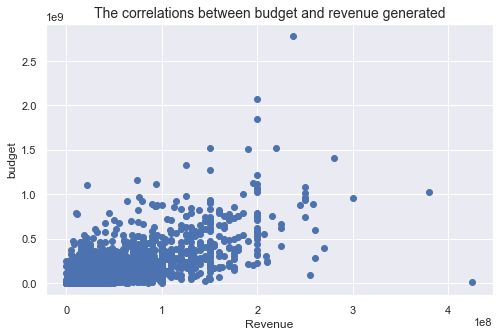

In [54]:
#using a scatter plot to show correlation between budget and Revenue generated
x= df2['budget']
y= df2['revenue']
plt.scatter(x,y);

# setting the perimeters of the plot
plt.title('The correlations between budget and revenue generated', fontsize = 14)
plt.xlabel('Revenue', fontsize = 12)
plt.ylabel('budget', fontsize = 12);

The scatter plot shows that there is a positive relationships between the amount budgeted for a movie and the revenue generated from the movie

## conclutions

in conclutions the insights drawn from our clean data were that:
1. the top 5 movies with the most earned profits where; Avater, star wars: the force awaken, Titanic, jurasic world and furious 7 WHILE the least earned profits were; the worriors way, the lone Ranger,the alamo, the needs Moms, Brother Bear.
2.  Animation was the most popular movies genre over the years
3. the genres that generated the highest revenues could not be accertained as the genre keep changing over a period of time, that is at some point it was Animation,it changes to adventures and so on.
4. the most popular  movies over a period of time was jurasic world.
5. lastly our data aslo shows that there is a positive corrolation between amount budgeted for a movie and the revenue generated.that is as the higher the money budgeted for a movie also the higher the revenue generated in returns.

## limitation

Although our dataset contains more than 10,000 rows it's pretty insufficient to draw precise conclusions based on the following:

1. Most of the data columns are irrelevant for the analysis which were droped

2. the datasets contains alots of null values which affected the total row numbers.

3. most of the revenue and budget data contains 0-valued which were treated as NAN and were removeed making the data insufficient to draw a pricised conclutions.
4. pipes were used in the genre column which makes its a little tidious to fix on time as aresult it was time consuming.


 stackoverflow was are resourceful place where some of my codes were gotten.